# 1. 유통 데이터 EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import UsefulFunction as uf

# 폰트 설정
import matplotlib as mpl
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

path = 'C:\\Windows\\Fonts\\NanumGothicCoding.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
print("font name : ", font_name)
plt.rc('font', family=font_name)

import os

os.listdir("./data")

font name :  NanumGothicCoding


['distribution.csv',
 'floating_population_by_age.csv',
 'floating_population_by_time.csv',
 'jongno_nowon_dong',
 'merged_sns.csv',
 'weather_jongno.csv',
 'weather_nowon.csv']

In [2]:
df_dist = pd.read_csv("./data/distribution.csv")

## 1.1 매출액 만원단위로 변경

In [3]:
df_dist.head()

,OPER_DT,BOR_CD,BOR_NM,ADMD_CD,ADMD_NM,AMT_IND,AMT_VAL,PROD_TP_CD,PROD_TP_NM,PROD_TP_AMT_VAL
0,20180401,1111,종로구,11110515,청운효자동,0.7369,755110.27,10,식사,210675.77
1,20180401,1111,종로구,11110515,청운효자동,0.7369,755110.27,20,간식,226231.04
2,20180401,1111,종로구,11110515,청운효자동,0.7369,755110.27,30,마실거리,252810.92
3,20180401,1111,종로구,11110515,청운효자동,0.7369,755110.27,40,홈&리빙,11779.72
4,20180401,1111,종로구,11110515,청운효자동,0.7369,755110.27,50,헬스&뷰티,40624.93


In [4]:
df_dist['AMT_VAL'] = df_dist['AMT_VAL'].apply(lambda x : x/10000) # 매출액 만원 단위로 변경
df_dist['PROD_TP_AMT_VAL'] = df_dist['PROD_TP_AMT_VAL'].apply(lambda x : np.round(x/10000, 3)) # 상품유형별 매출액 만원 단위로 변경

In [5]:
df_dist.head()

,OPER_DT,BOR_CD,BOR_NM,ADMD_CD,ADMD_NM,AMT_IND,AMT_VAL,PROD_TP_CD,PROD_TP_NM,PROD_TP_AMT_VAL
0,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,10,식사,21.068
1,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,20,간식,22.623
2,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,30,마실거리,25.281
3,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,40,홈&리빙,1.178
4,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,50,헬스&뷰티,4.062


## 1.2 DateTime 컬럼 생성

### 1.2.1 DateTime 형태의 일자 컬럼 생성

In [6]:
df_dist["OPER_DD"] = df_dist['OPER_DT'].apply(lambda x : pd.to_datetime(str(x), format="%Y%m%d"))
df_dist.head()

,OPER_DT,BOR_CD,BOR_NM,ADMD_CD,ADMD_NM,AMT_IND,AMT_VAL,PROD_TP_CD,PROD_TP_NM,PROD_TP_AMT_VAL,OPER_DD
0,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,10,식사,21.068,2018-04-01
1,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,20,간식,22.623,2018-04-01
2,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,30,마실거리,25.281,2018-04-01
3,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,40,홈&리빙,1.178,2018-04-01
4,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,50,헬스&뷰티,4.062,2018-04-01


In [7]:
df_dist = uf.move_col_back_to_front(df_dist) # 컬럼 순서 변경 : 맨뒤 -> 맨앞

In [8]:
df_dist.head()

,OPER_DD,OPER_DT,BOR_CD,BOR_NM,ADMD_CD,ADMD_NM,AMT_IND,AMT_VAL,PROD_TP_CD,PROD_TP_NM,PROD_TP_AMT_VAL
0,2018-04-01,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,10,식사,21.068
1,2018-04-01,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,20,간식,22.623
2,2018-04-01,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,30,마실거리,25.281
3,2018-04-01,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,40,홈&리빙,1.178
4,2018-04-01,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,50,헬스&뷰티,4.062


In [9]:
# 일자 컬럼에서 년월컬럼 추출
df_dist['OPER_YM'] = df_dist['OPER_DD'].apply(lambda x : x.strftime('%Y-%m'))

In [10]:
df_dist.head()

,OPER_DD,OPER_DT,BOR_CD,BOR_NM,ADMD_CD,ADMD_NM,AMT_IND,AMT_VAL,PROD_TP_CD,PROD_TP_NM,PROD_TP_AMT_VAL,OPER_YM
0,2018-04-01,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,10,식사,21.068,2018-04
1,2018-04-01,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,20,간식,22.623,2018-04
2,2018-04-01,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,30,마실거리,25.281,2018-04
3,2018-04-01,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,40,홈&리빙,1.178,2018-04
4,2018-04-01,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,50,헬스&뷰티,4.062,2018-04


In [11]:
df_dist = uf.move_col_back_to_front(df_dist) # 컬럼 순서 변경 : 맨뒤 -> 맨앞

In [12]:
df_dist.head()

,OPER_YM,OPER_DD,OPER_DT,BOR_CD,BOR_NM,ADMD_CD,ADMD_NM,AMT_IND,AMT_VAL,PROD_TP_CD,PROD_TP_NM,PROD_TP_AMT_VAL
0,2018-04,2018-04-01,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,10,식사,21.068
1,2018-04,2018-04-01,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,20,간식,22.623
2,2018-04,2018-04-01,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,30,마실거리,25.281
3,2018-04,2018-04-01,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,40,홈&리빙,1.178
4,2018-04,2018-04-01,20180401,1111,종로구,11110515,청운효자동,0.7369,75.511027,50,헬스&뷰티,4.062


In [13]:
# OPER_DT 컬럼 삭제
df_dist.drop(['OPER_DT'], axis=1, inplace=True)
df_dist.head()

,OPER_YM,OPER_DD,BOR_CD,BOR_NM,ADMD_CD,ADMD_NM,AMT_IND,AMT_VAL,PROD_TP_CD,PROD_TP_NM,PROD_TP_AMT_VAL
0,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,10,식사,21.068
1,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,20,간식,22.623
2,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,30,마실거리,25.281
3,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,40,홈&리빙,1.178
4,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,50,헬스&뷰티,4.062


## 1.3 컬럼값 분포 확인

In [14]:
# 종로구(1111)와 노원구(1135) 데이터 빈도수 확인
df_dist['BOR_CD'].value_counts()

1135    55416
1111    49584
Name: BOR_CD, dtype: int64

<br>

### 1.3.1 종로구 데이터와 노원구 데이터 분리

In [15]:
df_dist_j = df_dist[df_dist['BOR_CD'] == 1111]
df_dist_j.head()

,OPER_YM,OPER_DD,BOR_CD,BOR_NM,ADMD_CD,ADMD_NM,AMT_IND,AMT_VAL,PROD_TP_CD,PROD_TP_NM,PROD_TP_AMT_VAL
0,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,10,식사,21.068
1,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,20,간식,22.623
2,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,30,마실거리,25.281
3,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,40,홈&리빙,1.178
4,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,50,헬스&뷰티,4.062


In [16]:
df_dist_n = df_dist[df_dist['BOR_CD'] == 1135]
df_dist_n.head()

,OPER_YM,OPER_DD,BOR_CD,BOR_NM,ADMD_CD,ADMD_NM,AMT_IND,AMT_VAL,PROD_TP_CD,PROD_TP_NM,PROD_TP_AMT_VAL
136,2018-04,2018-04-01,1135,노원구,11350560,월계1동,0.8564,87.756336,10,식사,29.126
137,2018-04,2018-04-01,1135,노원구,11350560,월계1동,0.8564,87.756336,20,간식,18.429
138,2018-04,2018-04-01,1135,노원구,11350560,월계1동,0.8564,87.756336,30,마실거리,31.856
139,2018-04,2018-04-01,1135,노원구,11350560,월계1동,0.8564,87.756336,40,홈&리빙,2.501
140,2018-04,2018-04-01,1135,노원구,11350560,월계1동,0.8564,87.756336,50,헬스&뷰티,4.283


<br>

## 1.4 지역별 월별 매출

### 1.4.1 종로구 월별 매출

In [17]:
df_dist_j_m = df_dist_j[['OPER_YM','PROD_TP_AMT_VAL']]
df_dist_j_m2 = df_dist_j_m.groupby(df_dist_j_m.OPER_YM).sum().reset_index()
df_dist_j_m2.rename(columns={"PROD_TP_AMT_VAL": "AMT_VAL"}, inplace=True)
df_dist_j_m2.head()

,OPER_YM,AMT_VAL
0,2018-04,58243.979
1,2018-05,62895.434
2,2018-06,63273.860
3,2018-07,62362.557
4,2018-08,65882.527


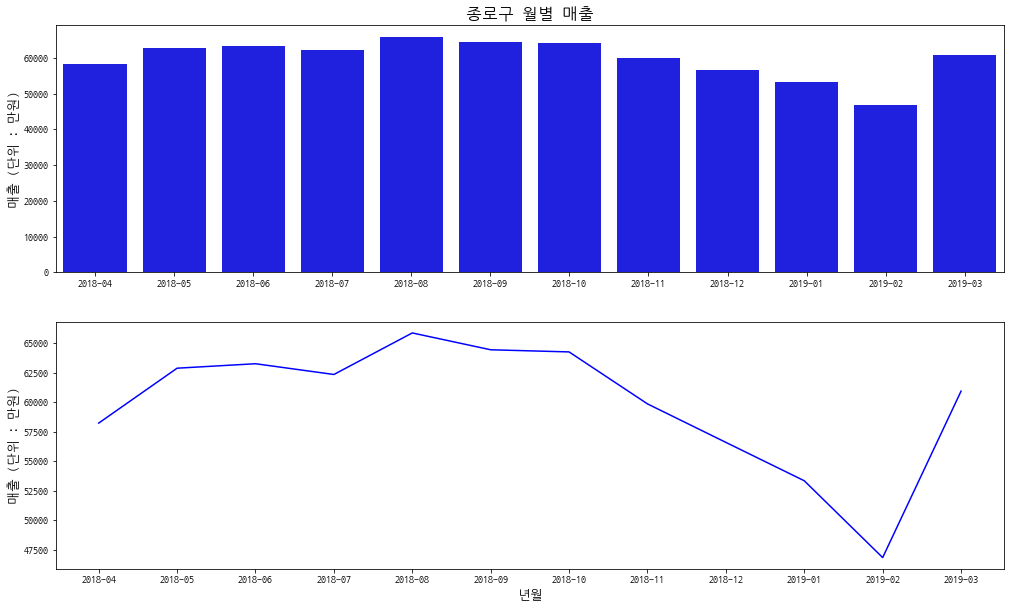

In [18]:
plt.figure(figsize=(17, 10))

plt.subplot(211)
g1 = sns.barplot(x='OPER_YM', y='AMT_VAL', data=df_dist_j_m2, color="blue")
g1.set_title("종로구 월별 매출", fontsize=16)
g1.set_xlabel("", fontsize=13)
g1.set_ylabel("매출 (단위 : 만원)", fontsize=13)

plt.subplot(212)
g2 = sns.lineplot(x='OPER_YM', y='AMT_VAL', data=df_dist_j_m2, color="blue")
g2.set_xlabel("년월", fontsize=13)
g2.set_ylabel("매출 (단위 : 만원)", fontsize=13)

plt.show()

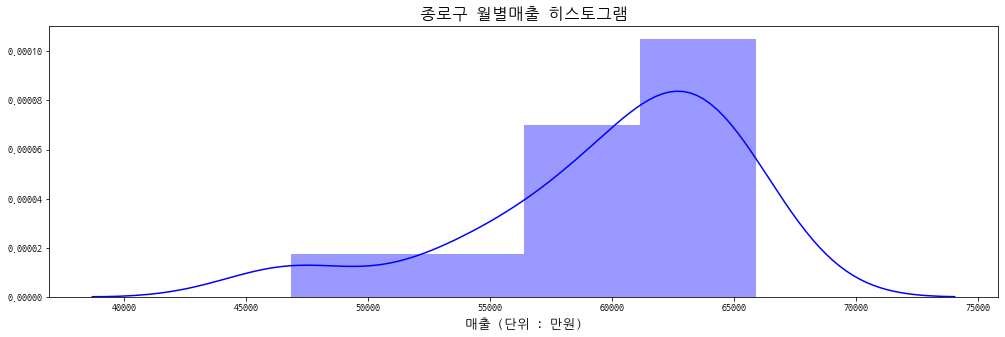

In [19]:
plt.figure(figsize=(17, 5))

g3 = sns.distplot(df_dist_j_m2['AMT_VAL'], color="blue")
g3.set_title("종로구 월별매출 히스토그램", fontsize=16)
g3.set_xlabel("매출 (단위 : 만원)", fontsize=13)

plt.show()

<br>

### 1.4.2 노원구 월별 매출

In [20]:
df_dist_n_m = df_dist_n[['OPER_YM','PROD_TP_AMT_VAL']]
df_dist_n_m2 = df_dist_n_m.groupby(df_dist_n_m.OPER_YM).sum().reset_index()
df_dist_n_m2.rename(columns={"PROD_TP_AMT_VAL": "AMT_VAL"}, inplace=True)
df_dist_n_m2.head()

,OPER_YM,AMT_VAL
0,2018-04,57740.098
1,2018-05,60622.864
2,2018-06,63935.929
3,2018-07,65595.327
4,2018-08,68126.310


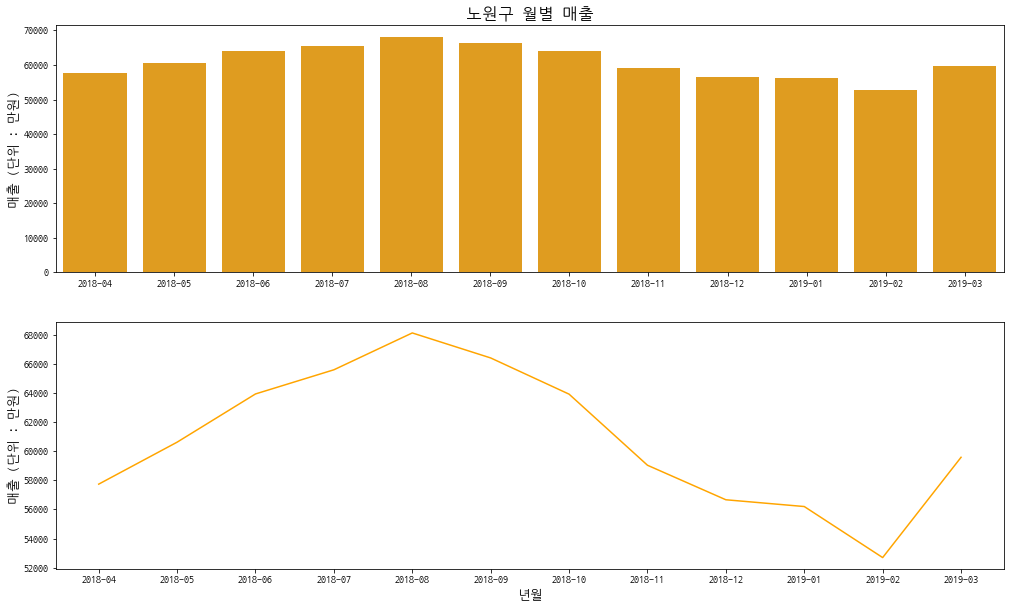

In [21]:
plt.figure(figsize=(17, 10))

plt.subplot(211)
g1 = sns.barplot(x='OPER_YM', y='AMT_VAL', data=df_dist_n_m2, color="orange")
g1.set_title("노원구 월별 매출", fontsize=16)
g1.set_xlabel("", fontsize=13)
g1.set_ylabel("매출 (단위 : 만원)", fontsize=13)

plt.subplot(212)
g2 = sns.lineplot(x='OPER_YM', y='AMT_VAL', data=df_dist_n_m2, color="orange")
g2.set_xlabel("년월", fontsize=13)
g2.set_ylabel("매출 (단위 : 만원)", fontsize=13)

plt.show()

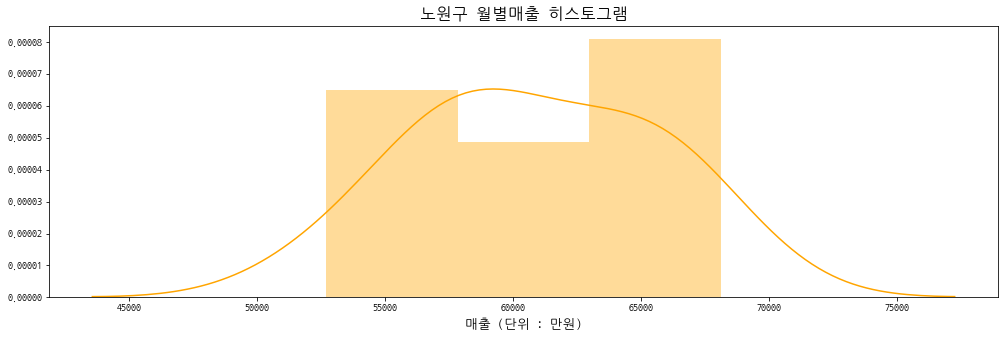

In [22]:
plt.figure(figsize=(17, 5))

g3 = sns.distplot(df_dist_n_m2['AMT_VAL'], color="orange")
g3.set_title("노원구 월별매출 히스토그램", fontsize=16)
g3.set_xlabel("매출 (단위 : 만원)", fontsize=13)

plt.show()

### 1.4.3 지역별 월별 매출 비교

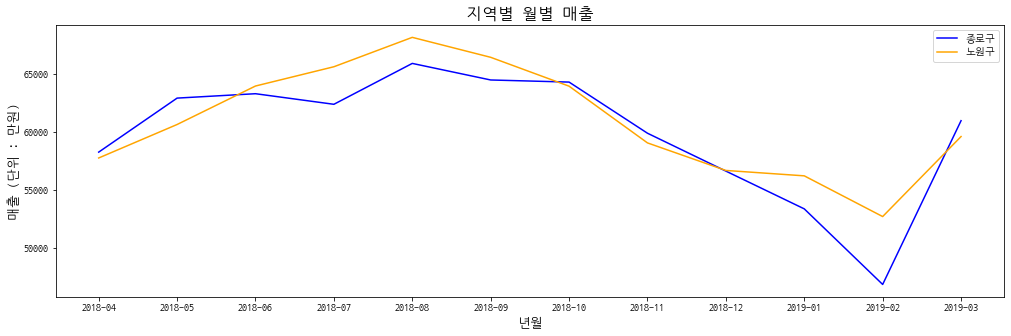

In [23]:
plt.figure(figsize=(17, 5))

g1 = sns.lineplot(x='OPER_YM', y='AMT_VAL', data=df_dist_j_m2, label="종로구", color="blue")
g1 = sns.lineplot(x='OPER_YM', y='AMT_VAL', data=df_dist_n_m2, label="노원구", color="orange")
g1.legend(loc="best")
g1.set_title("지역별 월별 매출", fontsize=16)
g1.set_xlabel("년월", fontsize=13)
g1.set_ylabel("매출 (단위 : 만원)", fontsize=13)

plt.show()

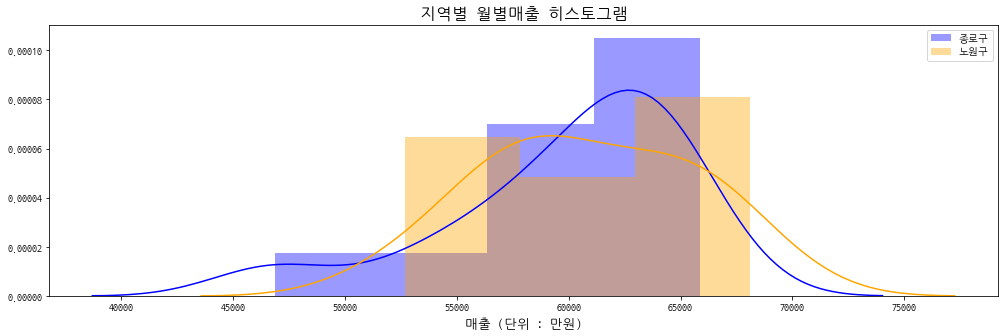

In [24]:
plt.figure(figsize=(17, 5))

g2 = sns.distplot(df_dist_j_m2['AMT_VAL'], color="blue", label="종로구")
g2 = sns.distplot(df_dist_n_m2['AMT_VAL'], color="orange", label="노원구")
g2.set_title("지역별 월별매출 히스토그램", fontsize=16)
g2.set_xlabel("매출 (단위 : 만원)", fontsize=13)
g2.legend(loc="best")

plt.show()

<br>

## 1.5 지역별 일별 매출

### 1.5.1 종로구 일별 매출

In [25]:
df_dist_j_d = df_dist_j[['OPER_DD','PROD_TP_AMT_VAL']]
df_dist_j_d2 = df_dist_j_d.groupby(df_dist_j_d.OPER_DD).sum().reset_index()
df_dist_j_d2.rename(columns={"PROD_TP_AMT_VAL": "AMT_VAL"}, inplace=True)
df_dist_j_d2.head()

,OPER_DD,AMT_VAL
0,2018-04-01,1742.609
1,2018-04-02,1920.664
2,2018-04-03,1915.764
3,2018-04-04,1925.493
4,2018-04-05,1839.681


C:\Users\shkim\AppData\Local\conda\conda\envs\python36\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


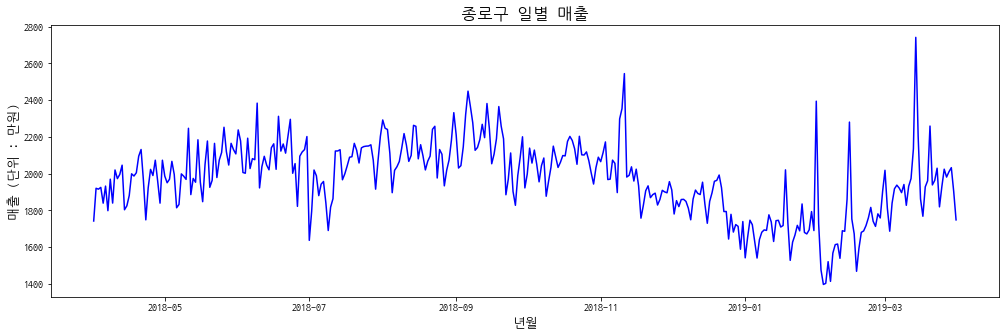

In [26]:
plt.figure(figsize=(17, 5))

g = sns.lineplot(x='OPER_DD', y='AMT_VAL', data=df_dist_j_d2, color="blue")
g.set_title("종로구 일별 매출", fontsize=16)
g.set_xlabel("년월", fontsize=13)
g.set_ylabel("매출 (단위 : 만원)", fontsize=13)

plt.show()

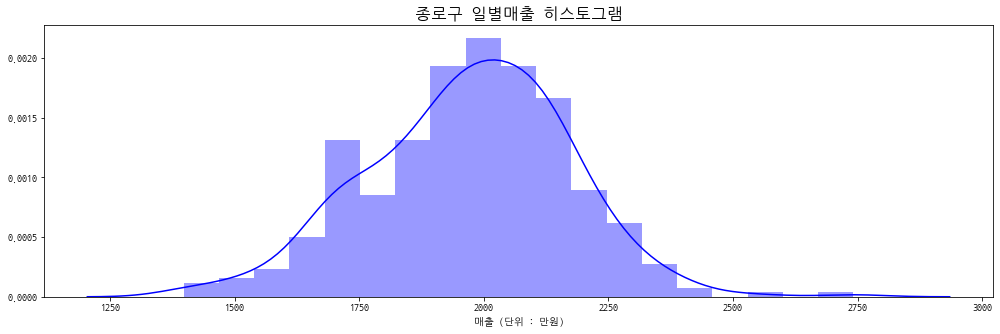

In [27]:
plt.figure(figsize=(17, 5))

g = sns.distplot(df_dist_j_d2['AMT_VAL'], color="blue")
g.set_title("종로구 일별매출 히스토그램", fontsize=16)
g.set_xlabel("매출 (단위 : 만원)")

plt.show()

<br>

### 1.5.2 노원구 일별 매출

In [28]:
df_dist_n_d = df_dist_n[['OPER_DD','PROD_TP_AMT_VAL']]
df_dist_n_d2 = df_dist_n_d.groupby(df_dist_n_d.OPER_DD).sum().reset_index()
df_dist_n_d2.rename(columns={"PROD_TP_AMT_VAL": "AMT_VAL"}, inplace=True)
df_dist_n_d2.head()

,OPER_DD,AMT_VAL
0,2018-04-01,1929.018
1,2018-04-02,1847.341
2,2018-04-03,1803.744
3,2018-04-04,1832.781
4,2018-04-05,1687.995


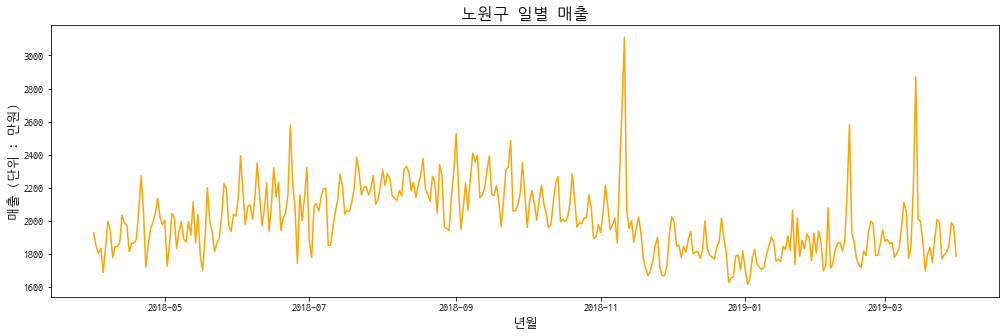

In [29]:
plt.figure(figsize=(17, 5))

g = sns.lineplot(x='OPER_DD', y='AMT_VAL', data=df_dist_n_d2, color="orange")
g.set_title("노원구 일별 매출", fontsize=16)
g.set_xlabel("년월", fontsize=13)
g.set_ylabel("매출 (단위 : 만원)", fontsize=13)

plt.show()

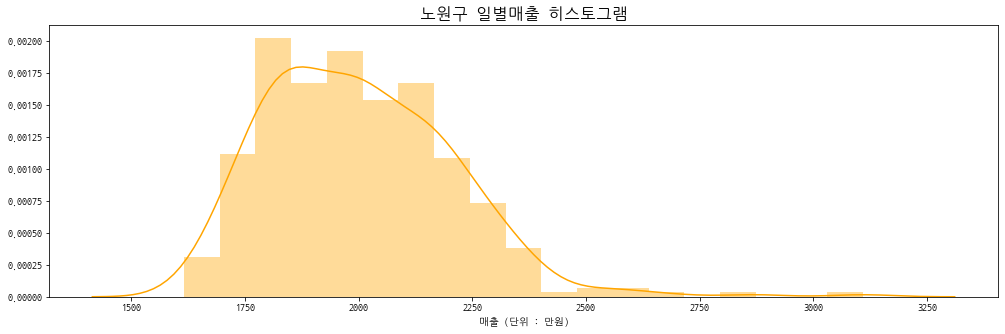

In [30]:
plt.figure(figsize=(17, 5))

g = sns.distplot(df_dist_n_d2['AMT_VAL'], color="orange")
g.set_title("노원구 일별매출 히스토그램", fontsize=16)
g.set_xlabel("매출 (단위 : 만원)")

plt.show()

### 1.5.3 지역별 일별 매출 비교

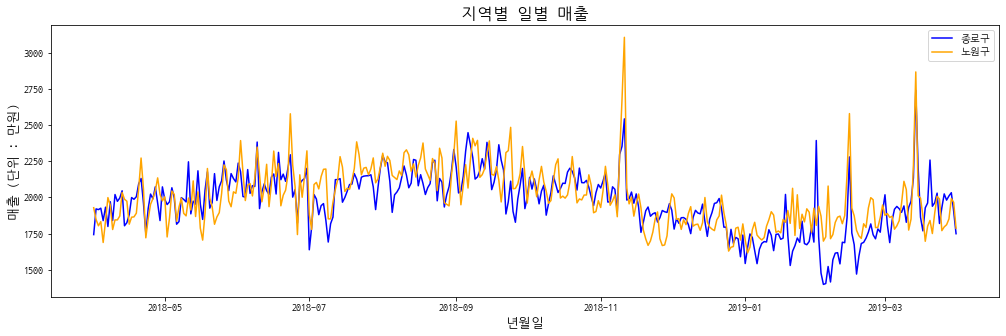

In [31]:
plt.figure(figsize=(17, 5))

g1 = sns.lineplot(x='OPER_DD', y='AMT_VAL', data=df_dist_j_d2, label="종로구", color="blue")
g1 = sns.lineplot(x='OPER_DD', y='AMT_VAL', data=df_dist_n_d2, label="노원구", color="orange")
g1.legend(loc="best")
g1.set_title("지역별 일별 매출", fontsize=16)
g1.set_xlabel("년월일", fontsize=13)
g1.set_ylabel("매출 (단위 : 만원)", fontsize=13)

plt.show()

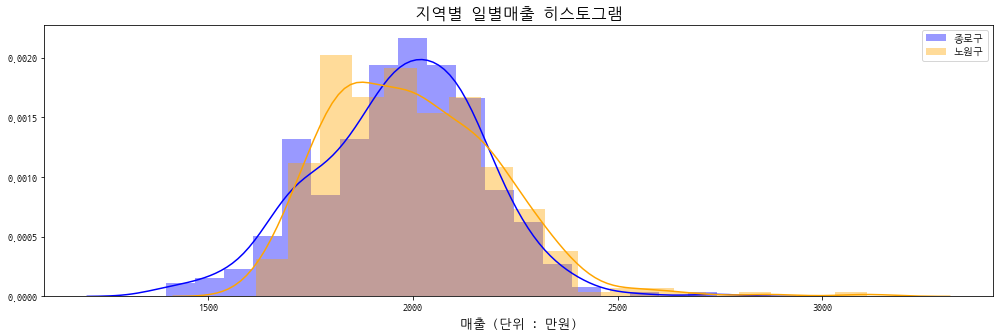

In [32]:
plt.figure(figsize=(17, 5))

g2 = sns.distplot(df_dist_j_d2['AMT_VAL'], color="blue", label="종로구")
g2 = sns.distplot(df_dist_n_d2['AMT_VAL'], color="orange", label="노원구")
g2.set_title("지역별 일별매출 히스토그램", fontsize=16)
g2.set_xlabel("매출 (단위 : 만원)", fontsize=13)
g2.legend(loc="best")

plt.show()

<br>

## 1.6 상품분류별 매출 비교

In [33]:
df_dist.head()

,OPER_YM,OPER_DD,BOR_CD,BOR_NM,ADMD_CD,ADMD_NM,AMT_IND,AMT_VAL,PROD_TP_CD,PROD_TP_NM,PROD_TP_AMT_VAL
0,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,10,식사,21.068
1,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,20,간식,22.623
2,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,30,마실거리,25.281
3,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,40,홈&리빙,1.178
4,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,50,헬스&뷰티,4.062


### 1.6.1 지역별 상품분류 빈도수

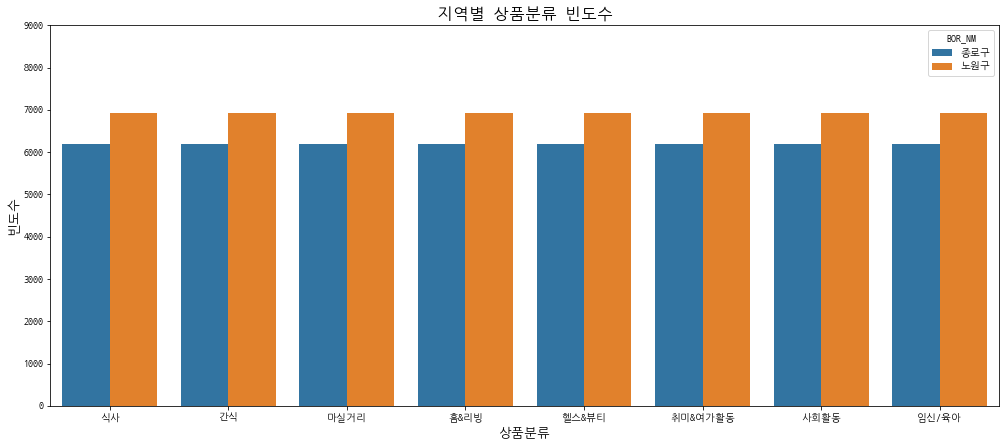

In [34]:
plt.figure(figsize=(17,7))

g = sns.countplot(x="PROD_TP_NM", data=df_dist, hue="BOR_NM")
g.set_ylim(0, 9000)
g.set_title("지역별 상품분류 빈도수", fontsize=16)
g.set_xlabel("상품분류", fontsize=13)
g.set_ylabel("빈도수", fontsize=13)

plt.show()

### 1.6.2 지역별 상품분류별 매출액

In [35]:
df_dist_j.head()

,OPER_YM,OPER_DD,BOR_CD,BOR_NM,ADMD_CD,ADMD_NM,AMT_IND,AMT_VAL,PROD_TP_CD,PROD_TP_NM,PROD_TP_AMT_VAL
0,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,10,식사,21.068
1,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,20,간식,22.623
2,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,30,마실거리,25.281
3,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,40,홈&리빙,1.178
4,2018-04,2018-04-01,1111,종로구,11110515,청운효자동,0.7369,75.511027,50,헬스&뷰티,4.062


In [36]:
df_dist_j_pt = df_dist_j['PROD_TP_AMT_VAL'].groupby(df_dist_j['PROD_TP_NM']).sum().reset_index()
df_dist_j_pt.rename(columns={"PROD_TP_AMT_VAL" : "AMT_VAL"}, inplace=True)
df_dist_j_pt # 종로구 상품유형별 매출액

,PROD_TP_NM,AMT_VAL
0,간식,145047.734
1,마실거리,258409.699
2,사회활동,9336.332
3,식사,229178.793
4,임신/육아,1719.257
5,취미&여가활동,4507.450
6,헬스&뷰티,47308.220
7,홈&리빙,23527.272


In [37]:
df_dist_j_pt2 = uf.sort_col_by_origin(df_dist, df_dist_j_pt, "PROD_TP_NM", "AMT_VAL") # 상품분류 순서 정렬
df_dist_j_pt2

,PROD_TP_NM,AMT_VAL
0,식사,229178.793
1,간식,145047.734
2,마실거리,258409.699
3,홈&리빙,23527.272
4,헬스&뷰티,47308.220
5,취미&여가활동,4507.450
6,사회활동,9336.332
7,임신/육아,1719.257


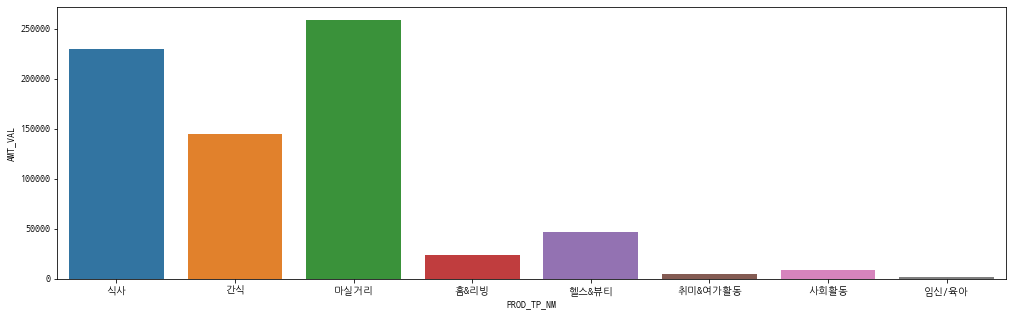

In [38]:
plt.figure(figsize=(17,5))

g = sns.barplot(x="PROD_TP_NM", y="AMT_VAL", data=df_dist_j_pt2)

plt.show()

In [39]:
df_dist_n_pt = df_dist_n['PROD_TP_AMT_VAL'].groupby(df_dist_n['PROD_TP_NM']).sum().reset_index()
df_dist_n_pt.rename(columns={"PROD_TP_AMT_VAL" : "AMT_VAL"}, inplace=True)
df_dist_n_pt # 노원구 상품유형별 매출액

,PROD_TP_NM,AMT_VAL
0,간식,161756.330
1,마실거리,265992.609
2,사회활동,5429.484
3,식사,240008.513
4,임신/육아,3614.634
5,취미&여가활동,4549.897
6,헬스&뷰티,31151.487
7,홈&리빙,18039.173


In [40]:
df_dist_n_pt2 = uf.sort_col_by_origin(df_dist, df_dist_n_pt, "PROD_TP_NM", "AMT_VAL") # 상품분류 순서 정렬
df_dist_n_pt2

,PROD_TP_NM,AMT_VAL
0,식사,240008.513
1,간식,161756.330
2,마실거리,265992.609
3,홈&리빙,18039.173
4,헬스&뷰티,31151.487
5,취미&여가활동,4549.897
6,사회활동,5429.484
7,임신/육아,3614.634


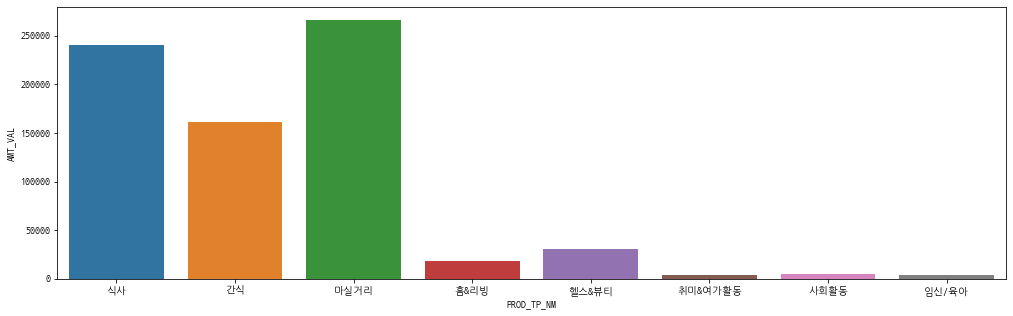

In [41]:
plt.figure(figsize=(17,5))

g = sns.barplot(x="PROD_TP_NM", y="AMT_VAL", data=df_dist_n_pt2)

plt.show()

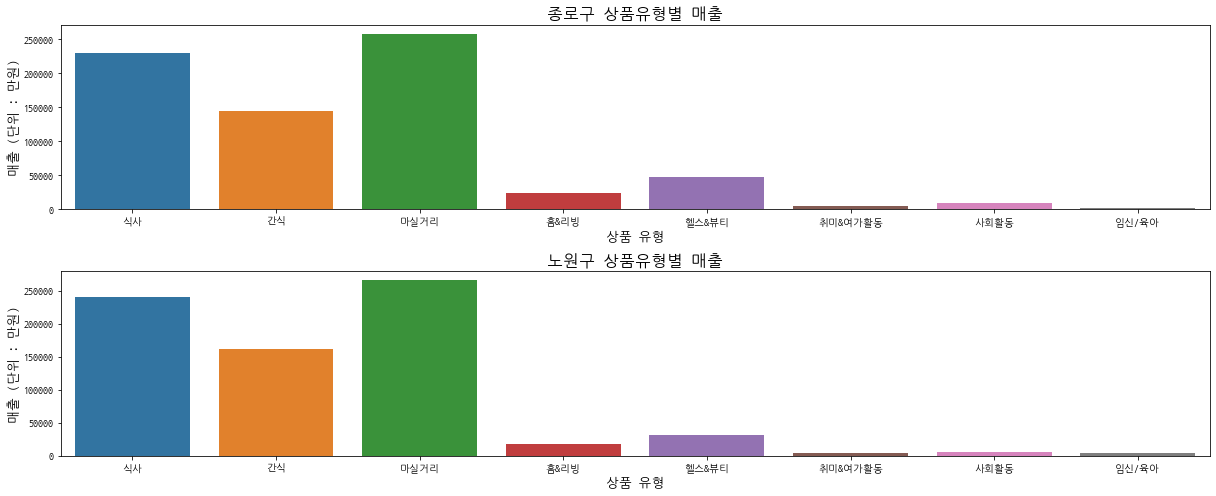

In [51]:
plt.figure(figsize=(17,7))

plt.subplot(211)
g1 = sns.barplot(x="PROD_TP_NM", y="AMT_VAL", data=df_dist_j_pt2)
g1.set_title("종로구 상품유형별 매출", fontsize=16)
g1.set_xlabel("상품 유형", fontsize=13)
g1.set_ylabel("매출 (단위 : 만원)", fontsize=13)

plt.subplot(212)
g2 = sns.barplot(x="PROD_TP_NM", y="AMT_VAL", data=df_dist_n_pt2)
g2.set_title("노원구 상품유형별 매출", fontsize=16)
g2.set_xlabel("상품 유형", fontsize=13)
g2.set_ylabel("매출 (단위 : 만원)", fontsize=13)

plt.tight_layout()

plt.show()

<br>

## 1.7 행정동별 매출 비교

### 1.7.1 종로구 행정동별 매출

In [57]:
df_dist_j_dong = df_dist_j[["ADMD_NM", "PROD_TP_AMT_VAL"]]
df_dist_j_dong = df_dist_j_dong.groupby(df_dist_j_dong.ADMD_NM).sum().reset_index()
df_dist_j_dong.rename(columns={"PROD_TP_AMT_VAL": "AMT_VAL"}, inplace=True)
df_dist_j_dong

,ADMD_NM,AMT_VAL
0,가회동,41462.386
1,교남동,35978.831
2,무악동,79987.396
3,부암동,51666.477
4,사직동,52431.592
5,삼청동,28665.986
6,숭인1동,42650.908
7,숭인2동,43476.520
8,이화동,46863.282
9,종로1.2.3.4가동,62953.151


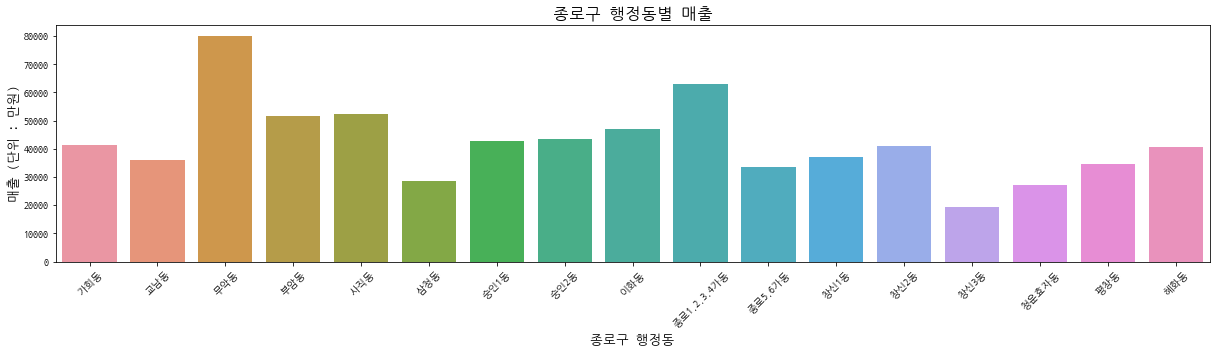

In [64]:
plt.figure(figsize=(17,5))

g = sns.barplot(x="ADMD_NM", y="AMT_VAL", data=df_dist_j_dong)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title("종로구 행정동별 매출", fontsize=16)
g.set_xlabel("종로구 행정동", fontsize=13)
g.set_ylabel("매출 (단위 : 만원)", fontsize=13)

plt.tight_layout()

plt.show()

<br>

### 1.7.2 노원구 행정동별 매출

In [62]:
df_dist_n_dong = df_dist_n[["ADMD_NM", "PROD_TP_AMT_VAL"]]
df_dist_n_dong = df_dist_n_dong.groupby(df_dist_n_dong.ADMD_NM).sum().reset_index()
df_dist_n_dong.rename(columns={"PROD_TP_AMT_VAL": "AMT_VAL"}, inplace=True)
df_dist_n_dong

,ADMD_NM,AMT_VAL
0,공릉1동,28303.227
1,공릉2동,31208.198
2,상계10동,31172.911
3,상계1동,30427.905
4,상계2동,52361.869
5,상계3.4동,33555.593
6,상계5동,30308.695
7,상계6.7동,39507.163
8,상계8동,51103.771
9,상계9동,35959.905


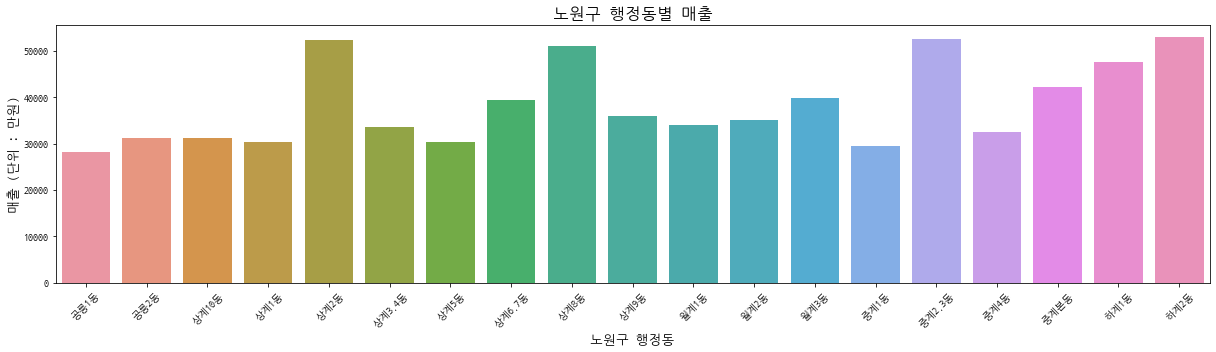

In [65]:
plt.figure(figsize=(17,5))

g = sns.barplot(x="ADMD_NM", y="AMT_VAL", data=df_dist_n_dong)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_title("노원구 행정동별 매출", fontsize=16)
g.set_xlabel("노원구 행정동", fontsize=13)
g.set_ylabel("매출 (단위 : 만원)", fontsize=13)

plt.tight_layout()

plt.show()

### 1.7.3 행정동별 매출 데이터 지도 그래프 시각화

In [71]:
import geopandas as gpd

dong_boundary = gpd.read_file("./data/jongno_nowon_dong/jongno_nowon_dong.shp", encoding="euckr")
dong_boundary.head()

,STD_YYYY,HDONG_CD,HDONG_NM,SIDO_CD,SIDO_NM,SGNG_CD,SGNG_NM,AREA,LENGTH,X_COORD,Y_COORD,geometry
0,2019,1111051500,청운효자동,11,서울특별시,11110,종로구,2573175.62,7975.05,126.9726940,37.5813060,"POLYGON ((954129.867 1953798.669, 954129.488 1..."
1,2019,1111053000,사직동,11,서울특별시,11110,종로구,1128161.02,5498.40,126.9709195,37.5734080,"POLYGON ((953819.581 1952337.088, 953807.836 1..."
2,2019,1111054000,삼청동,11,서울특별시,11110,종로구,1478468.25,7377.76,126.9840280,37.5820830,"POLYGON ((954899.127 1954728.195, 954867.220 1..."
3,2019,1111055000,부암동,11,서울특별시,11110,종로구,2276588.99,8912.71,126.9665000,37.5899170,"POLYGON ((953850.189 1955599.258, 953846.747 1..."
4,2019,1111056000,평창동,11,서울특별시,11110,종로구,8951336.18,13312.43,126.9689720,37.6025830,"POLYGON ((954707.968 1956727.983, 954700.682 1..."


In [ ]:
# 종로구
dong_boundary_j = dong_boundary[dong_bound]

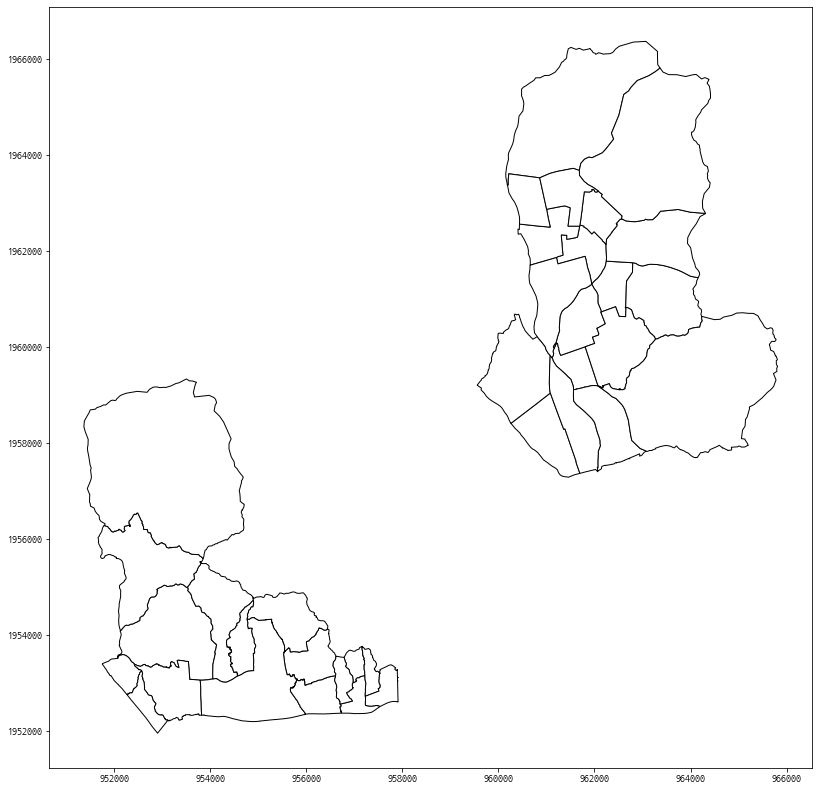

In [70]:
g = dong_boundary.plot(figsize=(14,14), color='w', edgecolor='k')